In [187]:
import numpy as np
import matplotlib.pyplot as plt
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
#print("Files in %r: %s" % (cwd, files))

def array_extender(filename): 
    with open(filename, "r") as inp: 
        data = inp.readlines()
    
    diameter = []
    nod = []
    inc = []
    ecc = []
    mag = []
    source = []

    for line in data[21:]: 
        parts = line.split()
        if len(parts) >= 22:  # Ensure the line has enough elements, removes the last few lines independent of file length
            diameter.append(float(parts[1]))
            source.append(float(parts[3]))    
            nod.append(float(parts[12]))
            inc.append(float(parts[9]))
            ecc.append(float(parts[10]))
            mag.append(float(parts[20]))

    nod = np.array(nod)
    inc = np.array(inc)
    ecc = np.array(ecc)
    source = np.array(source)
    diameter = [float(d) for d in diameter]
    diameter = np.array(diameter)
    return nod, inc, ecc, mag, source, diameter

def main(crs_file: str, det_file: str, date: str):
    nod_crs, inc_crs, ecc_22_crs,*_ = array_extender(crs_file) 
    nod_det, inc_det, ecc_22_det,*_ = array_extender(det_file)

    plt.title(f"Crossing objects vs. detected objects, date: {date}")
    plt.scatter(nod_crs, inc_crs, c = "r", s = 5, label = "crossings")
    plt.scatter(nod_det, inc_det, c = "b", s = 5, label = "detected")
    plt.xlabel("Right Ascension of Ascending Node $\Omega$ [°]")
    plt.ylabel("Inclination [°]")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    ratio = len(nod_det)/len(nod_crs)
    print(f"The ratio of detected objects vs. crossing objects: {ratio:.3f}")
    
def magnitude_plot(mag_crs: np.array, mag_det: np.array, year: int):   
    
    mag_crs = np.array([i for i in mag_crs if i > 7])    
    mag_det = np.array([i for i in mag_det if i > 7])    
    
    bin_edges = np.arange(7.5, 21.5, 1)
    #bin_edges = np.arange(21) - 0.5

    plt.figure(figsize=(10, 6))
    n1, bins1, patches1 = plt.hist(mag_crs, bins = bin_edges, edgecolor='black', label="crossing objects")
    n2, bins2, patches2 = plt.hist(mag_det, bins = bin_edges, edgecolor='black', label="detected objects")
    plt.xlabel('Apparent magnitude [mag]')
    plt.ylabel('Frequency')
    #plt.yscale("log")
    plt.xticks(range(7, 21))
    plt.title(f'Magnitude Histogram for statistical MASTER population {year} (mag 0 removed!)')
    plt.grid(True)
    plt.legend()
    plt.show()

def source_hist(sources: np.array, title: str):
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            plt.annotate('{}'.format(height),
                         xy=(rect.get_x() + rect.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

    bin_edges = np.arange(1, 8) - 0.5

    plt.hist(sources, bins=bin_edges, edgecolor='black', label="different debris sources")
    plt.xlabel('Source')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(True)
    plt.xticks(range(1, 7))
    plt.legend()
    
    n, bins, patches = plt.hist(sources, bins=bin_edges, edgecolor='black', label="different debris sources")
    autolabel(patches)
    plt.show()

def sort_for_sources(data: np.array, sources: np.array):
    """sorts the data according to the source of the space debris parts

    Args:
        sources (np.array): list of sources of the data

    Returns:
        TLE (np.array): list of all TLE objects
        fragments (np.array): list of all fragment objects
        rest (np.array): all other objects that are not TLE and not fragments
    """
    TLE = []
    fragments = []
    rest = []
    for source in sources: 
        if source == 4: 
            TLE.append(data[source])
        if source == 1:
            fragments.append(data[source])
        else: 
            rest.append(data[source])
    return np.array(TLE), np.array(fragments), np.array(rest)

def sources_vs_sizes(sources, diameter): 
    ind_1 = [i for i in range(len(sources)) if sources[i] == 0+1]
    ind_2 = [i for i in range(len(sources)) if sources[i] == 1+1]
    ind_3 = [i for i in range(len(sources)) if sources[i] == 2+1]
    ind_4 = [i for i in range(len(sources)) if sources[i] == 3+1]
    ind_5 = [i for i in range(len(sources)) if sources[i] == 4+1]
    ind_6 = [i for i in range(len(sources)) if sources[i] == 5+1]
    
    d1 = [diameter[i] for i in ind_1]
    print(d1)
    d2 = [diameter[i] for i in ind_2]
    print(d2)
    d3 = [diameter[i] for i in ind_3]
    print(d3)
    d4 = [diameter[i] for i in ind_4]
    print(d4)
    d5 = [diameter[i] for i in ind_5]
    print(d5)
    d6 = [diameter[i] for i in ind_6]
    print(d6)
    
    diameter_1 = np.mean([diameter[i] for i in ind_1])
    diameter_2 = np.mean([diameter[i] for i in ind_2])
    diameter_3 = np.mean([diameter[i] for i in ind_3])
    diameter_4 = np.mean([diameter[i] for i in ind_4])
    diameter_5 = np.mean([diameter[i] for i in ind_5])
    diameter_6 = np.mean([diameter[i] for i in ind_6])
    
    print(f"Average Diameter 1 (Fragments): {diameter_1:.3f}")
    print(f"Average Diameter 2 (SRM slag): {diameter_2:.3f}")
    print(f"Average Diameter 3 (NaK droplets): {diameter_3:.3f}")
    print(f"Average Diameter 4 (TLEs): {diameter_4:.3f}")
    print(f"Average Diameter 5 (Westford Needles): {diameter_5:.3f}")
    print(f"Average Diameter 6 (Multi-Layered Insulation): {diameter_6:.3f}")

In [188]:
#data from 2022 run, resolution of sampling factor = 1 (on)
#data contains objects from all orbit types
#main("stat_Master_22.crs", "stat_Master_22.det", "2022")

In [189]:
#data from 2022 run, resolution of sampling factor = 0 (off)
#data contains objects from all orbit types
#drastically reduces crossing, but the detections remain almost the same
#main("stat_Master_22_no_res_sampling_factor.crs", "stat_Master_22_no_res_sampling_factor.det", "2022")

In [190]:
#first example from schild (see PROOF-setupOK.txt,4)
#data from 2022 run, resolution of sampling factor = 0 (off)
#data contains objects from only GEO orbity
#main("stat_MASTER_0601-06_GEO.crs", "stat_MASTER_0601-06_GEO.det", "2022")

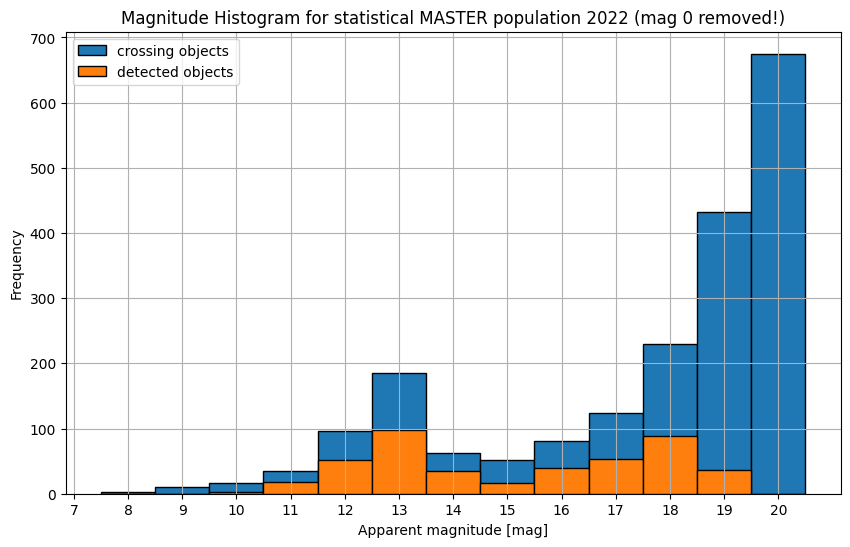

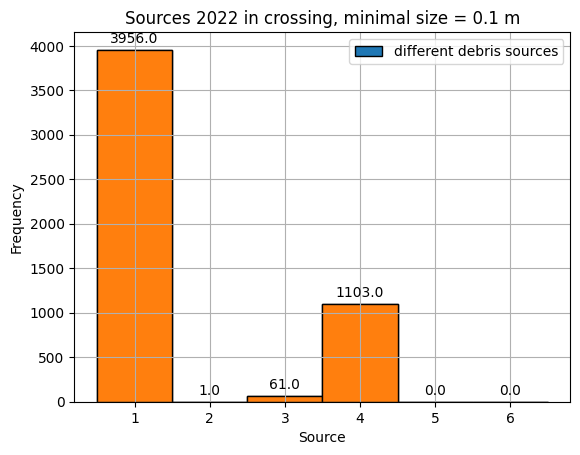

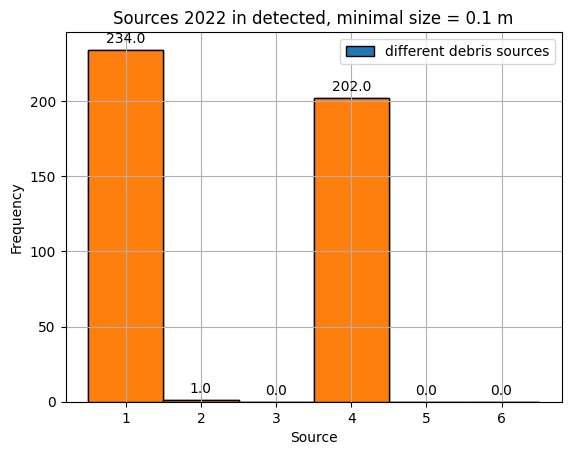

In [191]:
#magnitude plot for schild data
*_, mag_schild_crs, sources_crs, _ = array_extender("stat_MASTER_0601-06_GEO.crs")
*_, mag_schild_det, sources_det, _ = array_extender("stat_MASTER_0601-06_GEO.det")

magnitude_plot(mag_schild_crs, mag_schild_det, 2022)

source_hist(sources_crs, "Sources 2022 in crossing, minimal size = 0.1 m")
source_hist(sources_det, "Sources 2022 in detected, minimal size = 0.1 m")

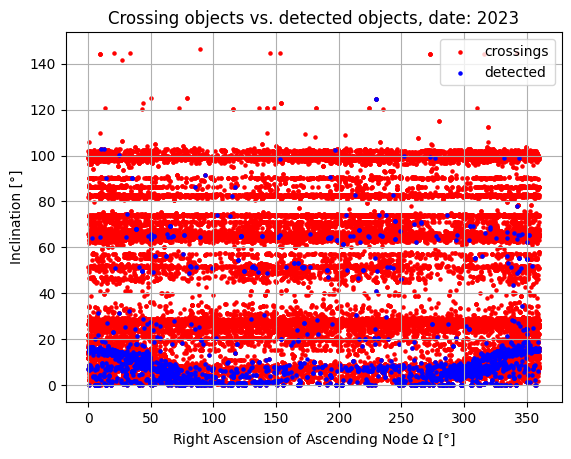

The ratio of detected objects vs. crossing objects: 0.056


In [192]:
#data from 2023 run, resolution of sampling factor = 0 (off)
#data contains objects from all orbit types
#main("stat_Master_23_no_res_sampling_factor.crs", "stat_Master_23_no_res_sampling_factor.det", "2023")

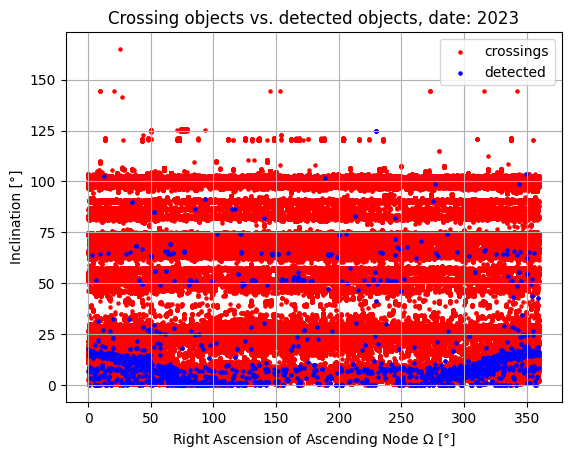

The ratio of detected objects vs. crossing objects: 0.002


In [193]:
#data from 2023 run, resolution of sampling factor = 1 (on)
#data contains objects from all orbit types
#main("stat_Master_23.crs", "stat_Master_23.det", "2023")

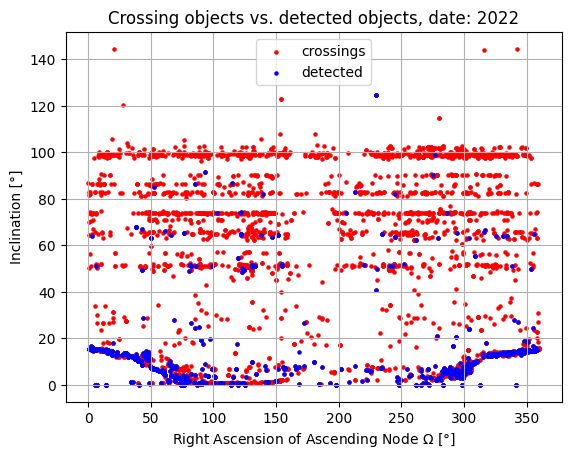

The ratio of detected objects vs. crossing objects: 0.216


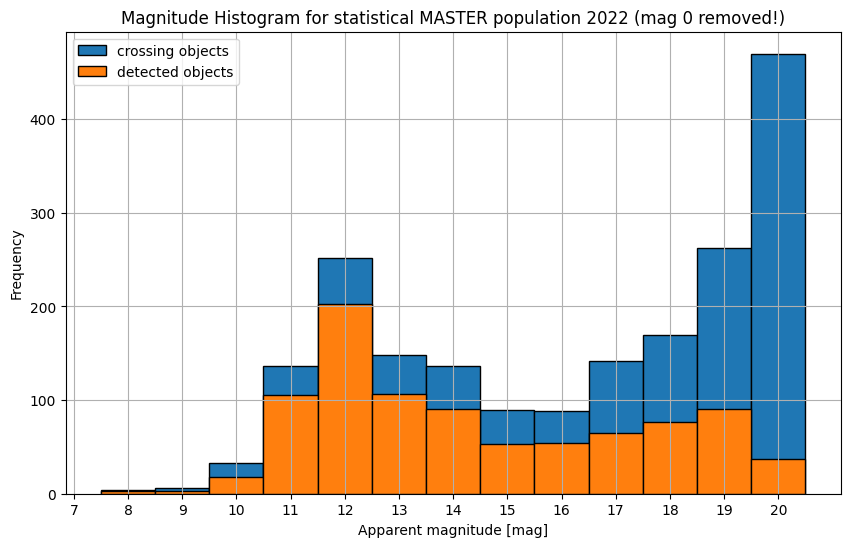

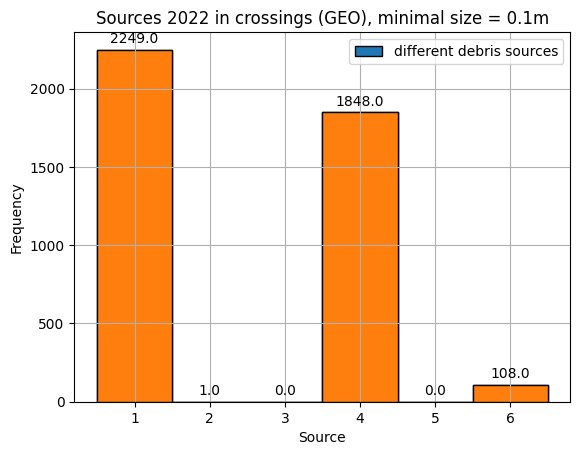

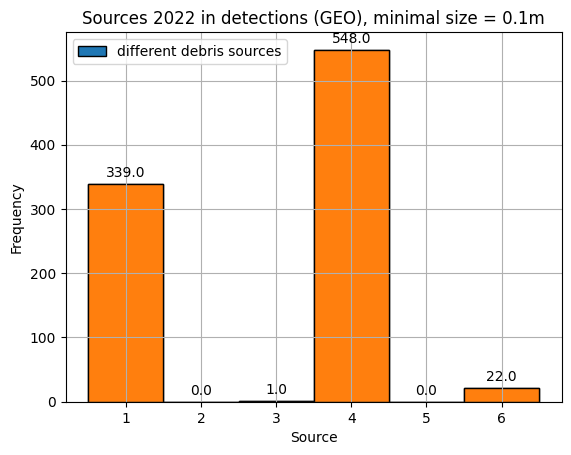

[1.67, 0.401, 0.216, 0.189, 0.155, 0.12, 0.313, 0.172, 0.129, 0.105, 0.907, 0.392, 0.229, 0.156, 0.124, 0.22, 0.21, 0.177, 0.155, 0.144, 0.123, 3.21, 0.315, 0.215, 0.155, 0.152, 0.137, 0.108, 0.559, 0.253, 0.133, 0.116, 0.109, 0.115, 1.0, 0.159, 0.142, 0.137, 0.124, 0.138, 0.129, 0.122, 0.444, 0.171, 0.158, 0.121, 0.121, 0.387, 0.166, 0.117, 0.118, 0.755, 0.196, 0.172, 0.132, 0.127, 0.114, 0.112, 0.11, 0.1, 0.18, 0.172, 0.172, 0.15, 0.213, 0.184, 0.171, 0.15, 0.106, 0.106, 0.103, 0.468, 0.159, 0.156, 0.152, 0.14, 0.131, 0.1, 0.468, 0.162, 0.151, 0.1, 0.194, 0.173, 0.133, 0.93, 0.118, 0.108, 1.0, 0.216, 0.174, 0.133, 0.115, 0.108, 0.103, 1.25, 0.638, 0.221, 0.22, 0.204, 0.166, 0.119, 0.109, 0.1, 0.18, 0.169, 0.134, 0.559, 0.288, 0.235, 0.233, 0.217, 0.167, 0.165, 0.142, 0.136, 0.128, 0.12, 0.112, 0.11, 16.4, 0.654, 0.396, 0.175, 0.147, 0.136, 16.4, 0.493, 0.406, 0.168, 0.166, 0.14, 0.13, 0.118, 0.108, 0.103, 0.387, 0.237, 0.222, 0.196, 0.107, 0.755, 0.27, 0.222, 0.214, 0.19, 0.176, 0.18

C:\Users\fionu_j7j6wq2\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\fionu_j7j6wq2\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [194]:
#2022 test with pop file from 2016 (not good!)
#geo orbit
main("stat_Master_22_geo_s1_test.crs", "stat_Master_22_geo_s1_test.det", "2022")

*_, mag_det, sources_det, diam_det = array_extender("stat_Master_22_geo_s1_test.det")
*_, mag_crs, sources_crs, diam_crs = array_extender("stat_Master_22_geo_s1_test.crs")

magnitude_plot(mag_crs, mag_det, 2022)
source_hist(sources_crs, "Sources 2022 in crossings (GEO), minimal size = 0.1m")
source_hist(sources_det, "Sources 2022 in detections (GEO), minimal size = 0.1m")

sources_vs_sizes(sources_crs, diam_crs)
sources_vs_sizes(sources_det, diam_det)

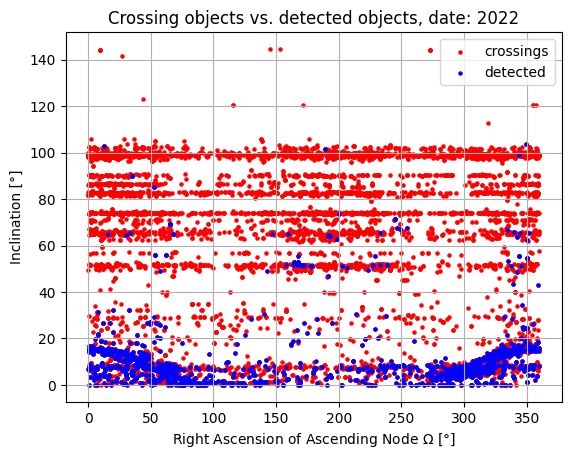

The ratio of detected objects vs. crossing objects: 0.211


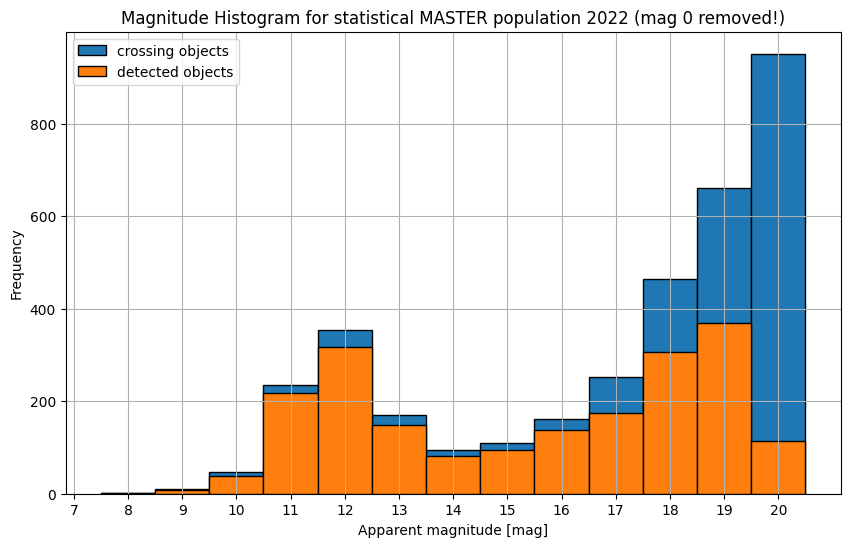

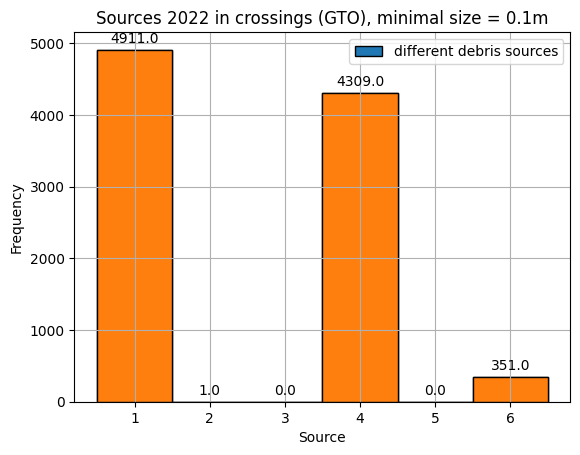

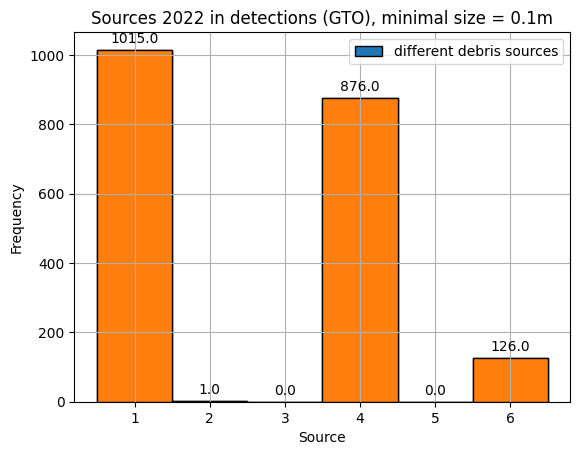

[0.878, 0.525, 0.226, 0.172, 0.162, 0.153, 0.124, 0.102, 0.101, 0.106, 0.285, 0.228, 0.16, 0.132, 0.127, 0.115, 0.112, 0.1, 0.648, 0.231, 0.106, 0.191, 0.175, 0.1, 0.103, 0.238, 0.185, 0.156, 0.135, 0.126, 0.116, 0.108, 0.175, 0.167, 0.133, 0.255, 0.238, 0.123, 0.102, 0.144, 0.147, 0.581, 0.207, 0.139, 0.581, 0.156, 0.154, 0.132, 0.108, 0.716, 0.46, 0.142, 0.119, 0.1, 0.716, 0.202, 0.147, 0.134, 0.101, 0.1, 0.447, 0.2, 0.134, 0.119, 0.106, 0.202, 0.157, 0.183, 0.122, 0.116, 0.115, 0.1, 0.1, 0.12, 0.106, 0.245, 0.138, 0.128, 0.138, 0.128, 0.118, 0.108, 0.444, 0.179, 0.157, 0.12, 0.11, 0.318, 0.114, 0.356, 0.203, 0.396, 0.1, 0.139, 0.106, 0.1, 0.251, 0.13, 0.123, 0.103, 8.3, 0.118, 0.111, 0.24, 0.136, 0.635, 0.326, 0.246, 0.254, 0.153, 0.139, 0.326, 0.233, 0.179, 0.408, 0.101, 0.135, 0.126, 0.209, 0.162, 0.157, 0.146, 0.118, 0.105, 0.105, 0.144, 0.129, 0.122, 0.107, 0.1, 0.101, 0.793, 0.28, 0.234, 0.203, 0.209, 0.13, 0.106, 0.105, 0.1, 0.793, 0.329, 0.203, 0.123, 0.115, 0.289, 0.218, 0.2

In [195]:
#2022 test with pop file from 2016 (not good!)
#gto orbit
main("stat_Master_22_gto_s1_test.crs", "stat_Master_22_gto_s1_test.det", "2022")

*_, mag_det, sources_det, diam_det = array_extender("stat_Master_22_gto_s1_test.det")
*_, mag_crs, sources_crs, diam_crs = array_extender("stat_Master_22_gto_s1_test.crs")

magnitude_plot(mag_crs, mag_det, 2022)
source_hist(sources_crs, "Sources 2022 in crossings (GTO), minimal size = 0.1m")
source_hist(sources_det, "Sources 2022 in detections (GTO), minimal size = 0.1m")

sources_vs_sizes(sources_crs, diam_crs)
sources_vs_sizes(sources_det, diam_det)

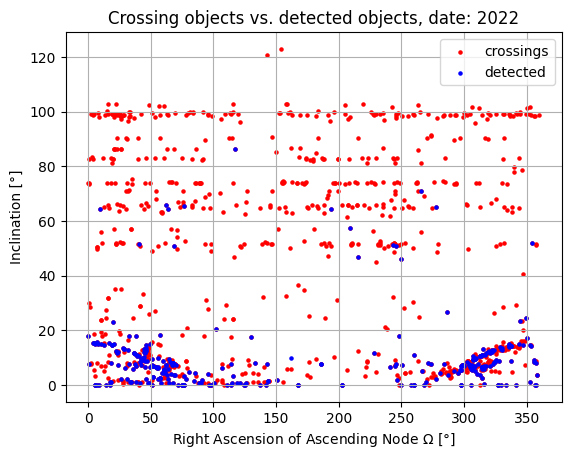

The ratio of detected objects vs. crossing objects: 0.277


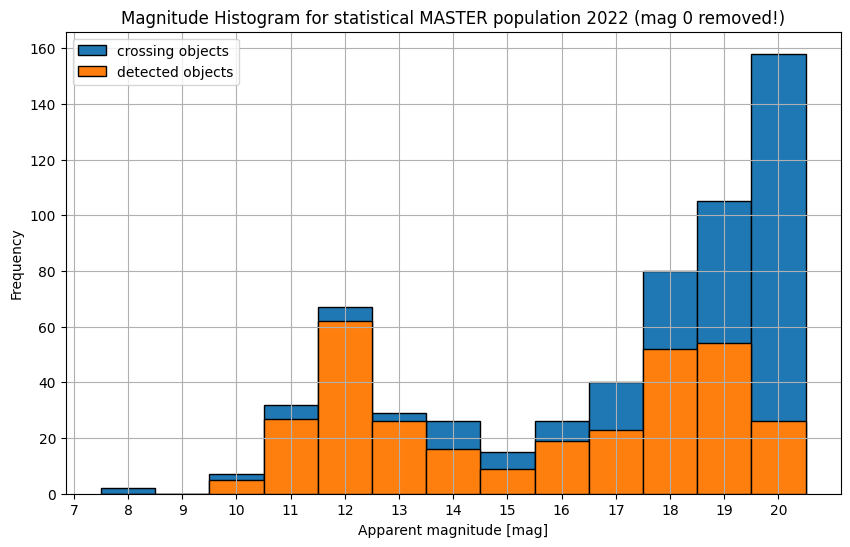

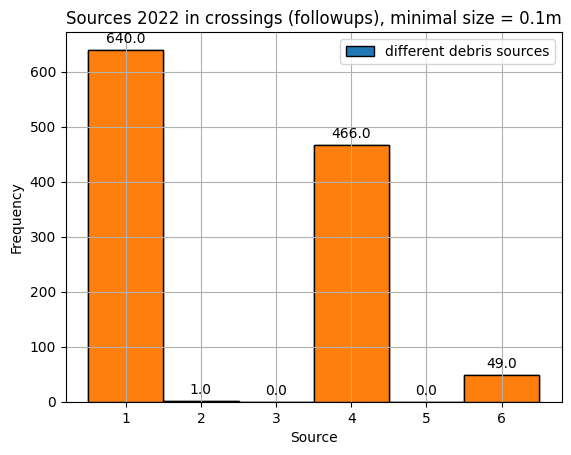

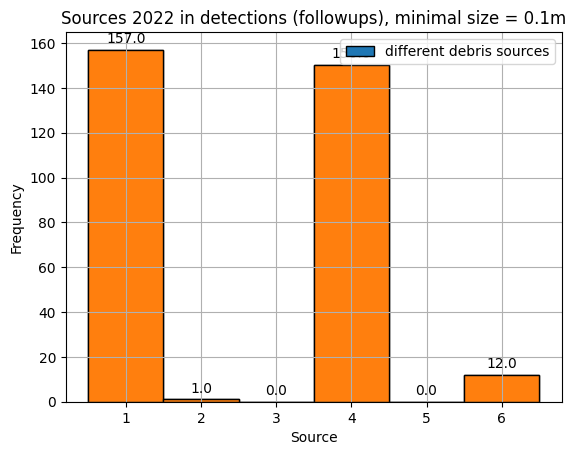

[0.156, 0.164, 0.385, 0.397, 0.124, 0.377, 0.206, 0.117, 0.153, 0.177, 0.176, 0.172, 0.13, 0.115, 0.147, 0.129, 0.127, 0.335, 0.105, 0.509, 0.256, 0.142, 0.33, 0.174, 0.143, 0.242, 0.18, 0.126, 0.354, 0.178, 0.137, 0.121, 0.107, 0.179, 0.128, 0.108, 0.227, 0.16, 0.148, 0.118, 0.298, 0.105, 0.396, 0.24, 0.131, 0.107, 0.284, 0.133, 0.326, 0.329, 0.323, 0.288, 0.144, 0.101, 0.139, 0.13, 0.427, 0.126, 0.102, 0.147, 0.101, 0.205, 0.144, 0.323, 0.118, 0.105, 0.111, 0.164, 0.124, 0.214, 0.128, 0.112, 0.111, 0.247, 0.244, 0.177, 5.72, 0.311, 0.163, 0.129, 0.124, 0.114, 0.157, 0.143, 0.371, 0.162, 0.119, 0.116, 0.215, 0.121, 0.125, 0.107, 0.235, 0.14, 0.136, 0.145, 0.228, 0.169, 0.121, 0.113, 0.232, 0.207, 0.151, 0.26, 0.247, 0.239, 0.211, 0.126, 0.115, 0.133, 0.1, 0.102, 0.102, 0.129, 3.0, 0.104, 0.192, 0.125, 0.138, 0.105, 0.138, 0.141, 0.104, 0.102, 0.277, 0.138, 0.265, 0.147, 0.13, 0.23, 0.272, 0.155, 0.141, 0.128, 0.118, 0.385, 0.369, 0.162, 0.144, 0.14, 5.48, 0.11, 0.191, 0.172, 0.231, 0.

In [196]:
#2022 test with pop file from 2016 (not good!)
#follow ups 
main("stat_Master_22_followup_s1_test.crs", "stat_Master_22_followup_s1_test.det", "2022")

*_, mag_det, sources_det, diam_det = array_extender("stat_Master_22_followup_s1_test.det")
*_, mag_crs, sources_crs, diam_crs = array_extender("stat_Master_22_followup_s1_test.crs")

magnitude_plot(mag_crs, mag_det, 2022)
source_hist(sources_crs, "Sources 2022 in crossings (followups), minimal size = 0.1m")
source_hist(sources_det, "Sources 2022 in detections (followups), minimal size = 0.1m")

sources_vs_sizes(sources_crs, diam_crs)
sources_vs_sizes(sources_det, diam_det)